# Визуализация данных в Python

<img src='img/barchart.gif' align=left with=500>

* Рисуем графики с  Matplotlib
* Наводим красоту с помощью Seaborn
* Добавляем интерактивность с помощью виджетов
* Интерактивные графики с помощью Plotly

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
# %matplotlib notebook

# Построение диаграмм

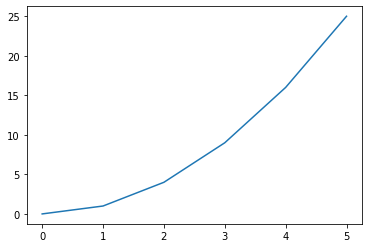

In [4]:
x = [1,2,3,4,5,6]
y = [0,1,4,9,16,25]

plt.plot(y)
plt.show()

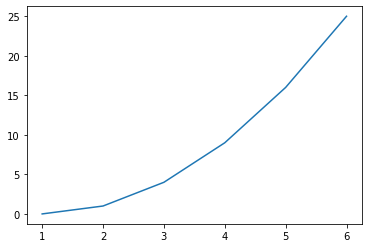

In [5]:
plt.plot(x,y)
plt.show()

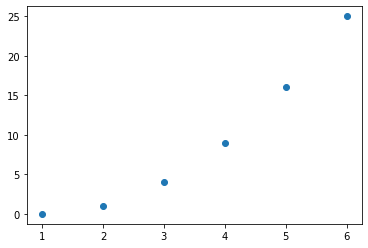

In [6]:
# Точечная диаграмма
plt.scatter(x,y)
plt.show()

Логарифмический масштаб

In [7]:
planets = ['Mercury', 'Venus', 'Earth', 'Mars','Jupiter', 'Saturn', 'Uranus', 'Neptune']
masses = [0.055274, 0.815, 1.0, 0.107, 317.8, 95.0, 14.6, 17.147]

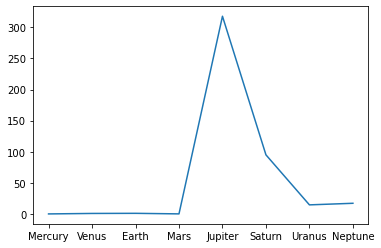

In [8]:
plt.plot(planets, masses)
plt.show()

In [9]:
masses[planets.index('Earth')]/masses[planets.index('Mercury')]

18.091688678221225

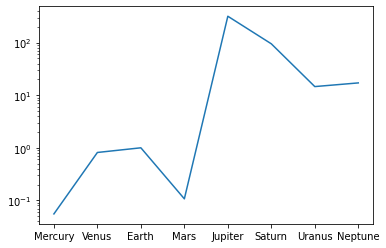

In [10]:
# Логарифмический масштаб
plt.plot(planets, masses)
plt.yscale(value='log')
plt.show()

In [11]:
planet_info = pd.Series(masses, index=planets)
planet_info

Mercury      0.055274
Venus        0.815000
Earth        1.000000
Mars         0.107000
Jupiter    317.800000
Saturn      95.000000
Uranus      14.600000
Neptune     17.147000
dtype: float64

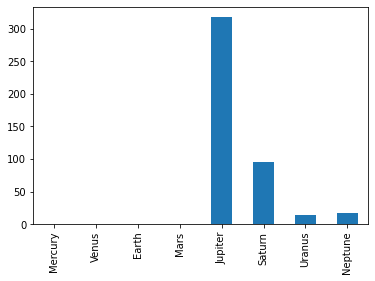

In [12]:
# Столбчатая диаграмма
planet_info.plot(kind='bar')
plt.show()

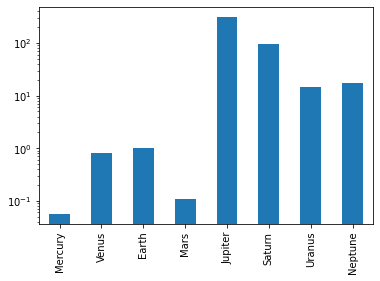

In [13]:
# Логорифмический масштаб
planet_info.plot(kind='bar', logy=True)
plt.show()

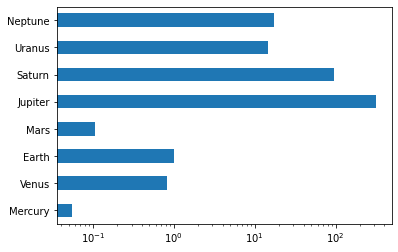

In [14]:
# Меняем ориентацию
planet_info.plot(kind='barh', logx=True)
plt.show()

In [15]:
a = [i for i in range(10)]
a

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

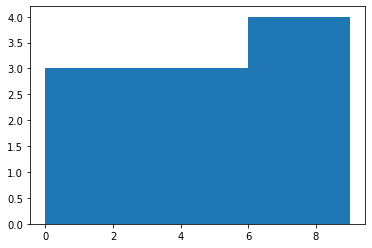

In [16]:
# Рисуем гистограмму
hist_info = plt.hist(a, bins=3)
# print(hist_info)
plt.show()

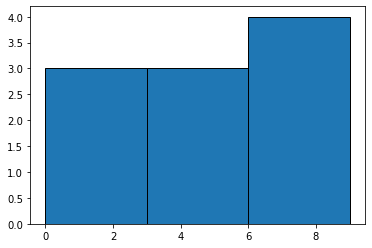

In [17]:
hist_info = plt.hist(a, bins=3, edgecolor='black')
plt.show()

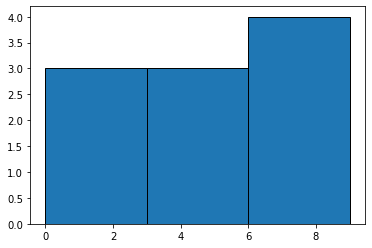

In [18]:
hist_info = plt.hist(a, bins=3, edgecolor='black')
plt.show()

# Визуализация на примере индекса Бигмака

* Индекс Бигмака  - неофициальный способ определения паритета покупательной способности

In [19]:
url = 'https://raw.githubusercontent.com/TheEconomist/big-mac-data/master/output-data/big-mac-full-index.csv'

In [20]:
bmi = pd.read_csv(url, parse_dates=True)

In [21]:
bmi.shape

(1520, 19)

In [22]:
bmi.columns

Index(['date', 'iso_a3', 'currency_code', 'name', 'local_price', 'dollar_ex',
       'dollar_price', 'USD_raw', 'EUR_raw', 'GBP_raw', 'JPY_raw', 'CNY_raw',
       'GDP_dollar', 'adj_price', 'USD_adjusted', 'EUR_adjusted',
       'GBP_adjusted', 'JPY_adjusted', 'CNY_adjusted'],
      dtype='object')

In [23]:
bmi.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,USD_raw,EUR_raw,GBP_raw,JPY_raw,CNY_raw,GDP_dollar,adj_price,USD_adjusted,EUR_adjusted,GBP_adjusted,JPY_adjusted,CNY_adjusted
0,2000-04-01,ARG,ARS,Argentina,2.50,1.00,2.500000,-0.00398,0.05007,-0.16722,-0.09864,1.09091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-04-01,AUS,AUD,Australia,2.59,1.68,1.541667,-0.38579,-0.35246,-0.48645,-0.44416,0.28939,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-04-01,BRA,BRL,Brazil,2.95,1.79,1.648045,-0.34341,-0.30778,-0.45102,-0.40581,0.37836,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-04-01,CAN,CAD,Canada,2.85,1.47,1.938776,-0.22758,-0.18566,-0.35417,-0.30099,0.62152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-04-01,CHE,CHF,Switzerland,5.90,1.70,3.470588,0.38270,0.45774,0.15609,0.25130,1.90267,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Выберем ближайший из доступных периодов
from datetime import datetime
bmi.date = pd.to_datetime(bmi.date)
bmi['daysdelta'] = datetime.now() - bmi.date
bmi['daysdelta'] = bmi['daysdelta'].apply(lambda x:x.days)
bmi = bmi[bmi['daysdelta'] == bmi['daysdelta'].min()].copy().reset_index()
bmi.head(2)

,index,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,USD_raw,EUR_raw,...,JPY_raw,CNY_raw,GDP_dollar,adj_price,USD_adjusted,EUR_adjusted,GBP_adjusted,JPY_adjusted,CNY_adjusted,daysdelta
0,1463,2021-07-01,ARE,AED,United Arab Emirates,14.75,3.67315,4.015627,-0.28927,-0.20049,...,0.13194,0.16161,31982.23,4.183747,-0.07801,-0.15560,-0.08734,0.21933,-0.07453,28
1,1464,2021-07-01,ARG,ARS,Argentina,380.00,96.33375,3.944620,-0.30184,-0.21462,...,0.11193,0.14107,8554.64,3.256918,0.16341,0.06551,0.15164,0.53862,0.16781,28


In [25]:
bm_price_series = bmi.set_index('name')['dollar_price']
bm_price_series.head()

name
United Arab Emirates    4.015627
Argentina               3.944620
Australia               4.792962
Azerbaijan              2.324897
Bahrain                 3.978780
Name: dollar_price, dtype: float64

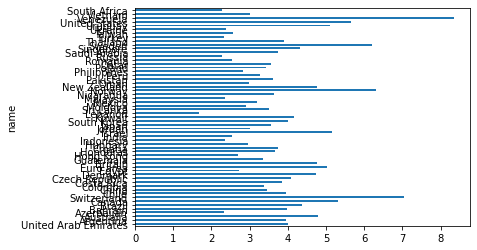

In [26]:
bm_price_series.plot(kind='barh')
plt.show()

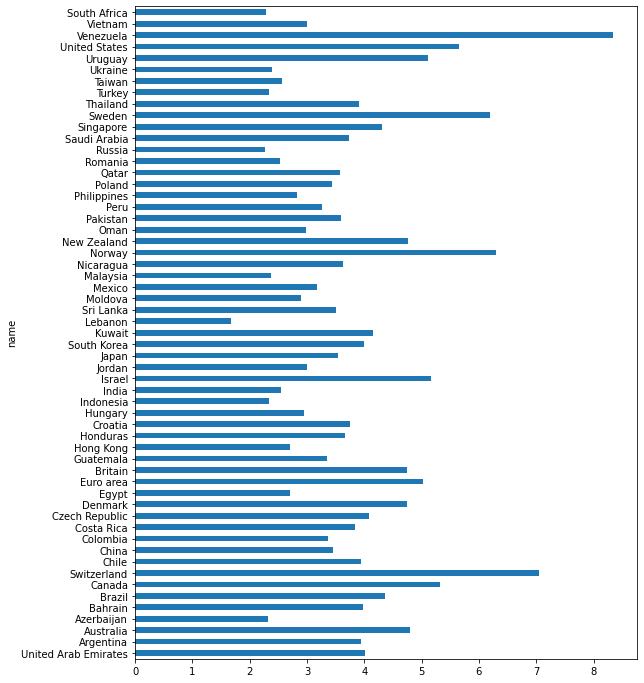

In [27]:
from pylab import rcParams
rcParams['figure.figsize'] = 9,12
bm_price_series.plot(kind='barh')
plt.show()

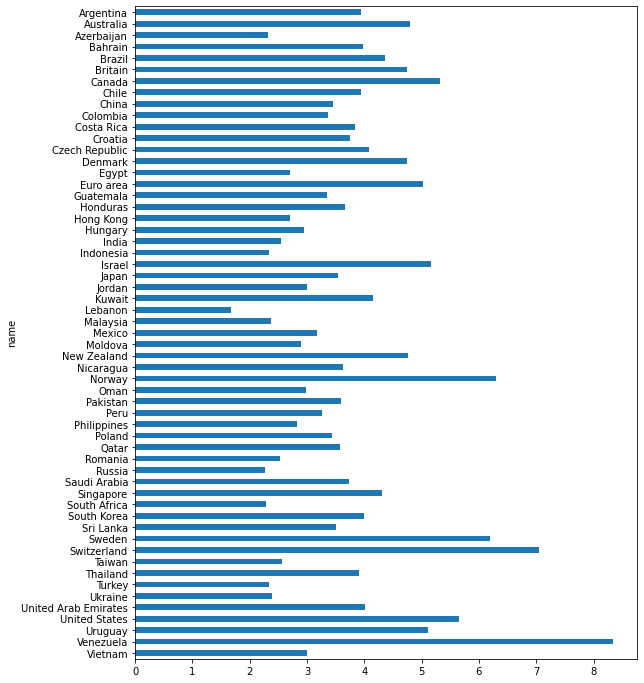

In [28]:
bm_price_series.sort_index(ascending=False).plot(kind='barh')
plt.show()

In [29]:
# Практичкеская часть
# Отсортируйте график по цене Бигмака


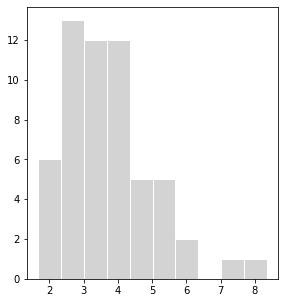

In [30]:
# Гистограмма
rcParams['figure.figsize']= 4.5,5
plt.hist(bm_price_series, ec='white', color='lightgrey')
plt.show()

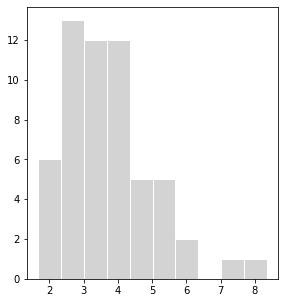

In [31]:
rcParams['figure.figsize']= 4.5,5
plt.hist(bm_price_series, ec='white', color='lightgrey')
plt.savefig('img/figa',)
plt.show()

In [32]:
x = np.linspace(-5,5,101)

In [33]:
x2 = x**2

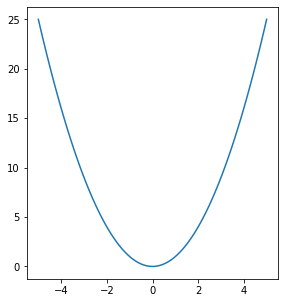

In [34]:
plt.plot(x, x**2)
plt.show()

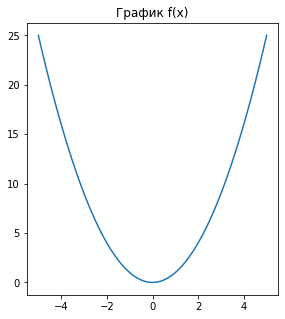

In [35]:
plt.plot(x, x2)
plt.title('График f(x)')
plt.show()

In [37]:
%config InlineBackend.figure_format = 'svg'

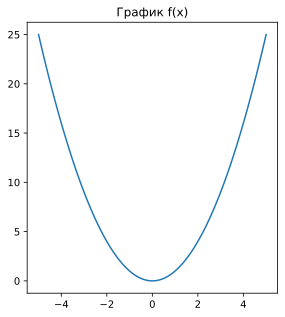

In [38]:
plt.plot(x, x2)
plt.title('График f(x)')
plt.show()

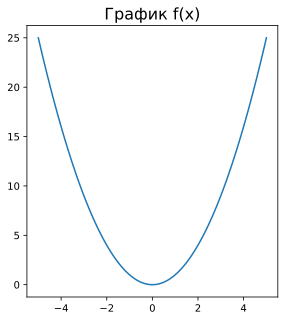

In [39]:
plt.plot(x, x2)
plt.title('График f(x)', fontsize=16)
plt.show()

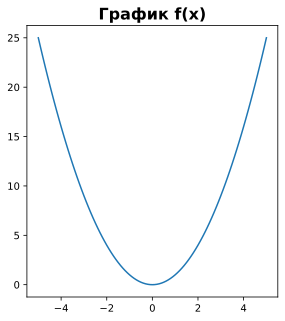

In [43]:
plt.plot(x, x2)
plt.title('График f(x)', fontsize=16, fontweight='bold')
plt.show()

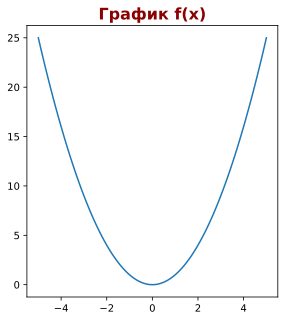

In [44]:
plt.plot(x, x2)
plt.title('График f(x)', fontsize=16, fontweight='bold', color='DarkRed')
plt.show()

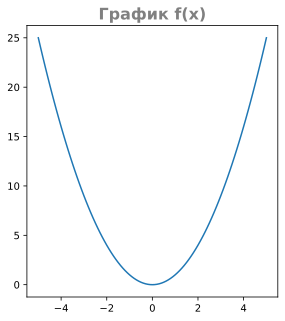

In [45]:
plt.plot(x, x2)
plt.title('График f(x)', fontsize=16, fontweight='bold', color='#808080')
plt.show()

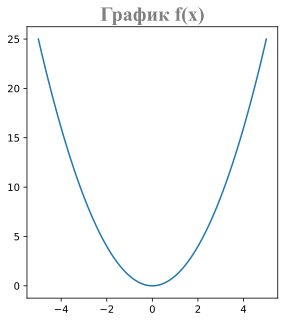

In [42]:
title_dict = {'fontsize':20, 
              'fontweight':'bold',
              'color':'#808080',
             'family':'Times New Roman'}
plt.plot(x, x2)
plt.title('График f(x)',fontdict=title_dict)
plt.show()

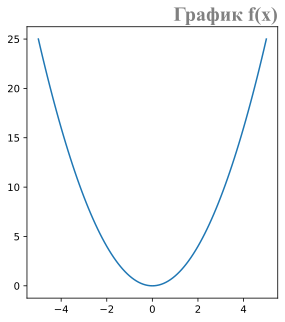

In [47]:
plt.plot(x, x2)
plt.title('График f(x)',fontdict=title_dict, loc='right')
plt.show()

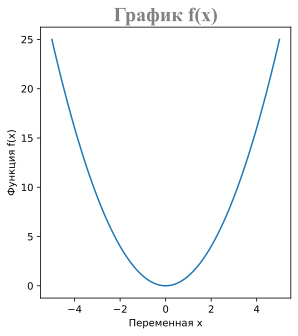

In [48]:
# Выводим названия осей
plt.plot(x, x2)
plt.title('График f(x)',fontdict=title_dict,)
plt.xlabel('Переменная x')
plt.ylabel('Функция f(x)')
plt.show()

In [49]:
# Создадим новую функцию
x3 = x**3
x3

array([-1.25000e+02, -1.17649e+02, -1.10592e+02, -1.03823e+02,
       -9.73360e+01, -9.11250e+01, -8.51840e+01, -7.95070e+01,
       -7.40880e+01, -6.89210e+01, -6.40000e+01, -5.93190e+01,
       -5.48720e+01, -5.06530e+01, -4.66560e+01, -4.28750e+01,
       -3.93040e+01, -3.59370e+01, -3.27680e+01, -2.97910e+01,
       -2.70000e+01, -2.43890e+01, -2.19520e+01, -1.96830e+01,
       -1.75760e+01, -1.56250e+01, -1.38240e+01, -1.21670e+01,
       -1.06480e+01, -9.26100e+00, -8.00000e+00, -6.85900e+00,
       -5.83200e+00, -4.91300e+00, -4.09600e+00, -3.37500e+00,
       -2.74400e+00, -2.19700e+00, -1.72800e+00, -1.33100e+00,
       -1.00000e+00, -7.29000e-01, -5.12000e-01, -3.43000e-01,
       -2.16000e-01, -1.25000e-01, -6.40000e-02, -2.70000e-02,
       -8.00000e-03, -1.00000e-03,  0.00000e+00,  1.00000e-03,
        8.00000e-03,  2.70000e-02,  6.40000e-02,  1.25000e-01,
        2.16000e-01,  3.43000e-01,  5.12000e-01,  7.29000e-01,
        1.00000e+00,  1.33100e+00,  1.72800e+00,  2.197

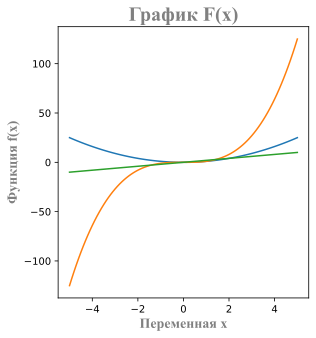

In [50]:
# Выводим 2 линии
labels_dict = {'fontsize':14, 
              'fontweight':'bold',
              'color':'#808080',
             'family':'Times New Roman'}

plt.plot(x, x2)
plt.plot(x, x3)
plt.plot(x, x*2)
plt.title("График F(x)", fontdict=title_dict)
plt.xlabel('Переменная x',fontdict=labels_dict)
plt.ylabel('Функция f(x)',fontdict=labels_dict)
plt.show()

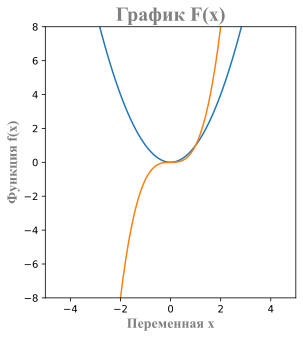

In [51]:
# Ограничиваем значения осей
plt.axis([-5,5,-8,8])
plt.plot(x, x2)
plt.plot(x, x3)
plt.title("График F(x)", fontdict=title_dict)
plt.xlabel('Переменная x',fontdict=labels_dict)
plt.ylabel('Функция f(x)',fontdict=labels_dict)
plt.show()

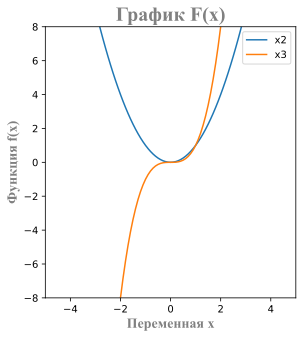

In [52]:
# Добавляем легенду
plt.axis([-5,5,-8,8])
plt.plot(x, x2)
plt.plot(x, x3)
plt.title("График F(x)", fontdict=title_dict)
plt.xlabel('Переменная x',fontdict=labels_dict)
plt.ylabel('Функция f(x)',fontdict=labels_dict)
plt.legend(labels=['x2','x3'])
plt.show()

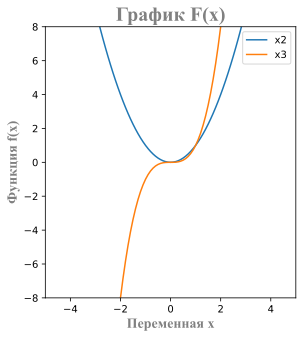

In [53]:
# Добавляем легенду в линиях
plt.axis([-5,5,-8,8])
plt.plot(x, x2, label='x2')
plt.plot(x, x3, label='x3')
plt.title("График F(x)", fontdict=title_dict)
plt.xlabel('Переменная x',fontdict=labels_dict)
plt.ylabel('Функция f(x)',fontdict=labels_dict)
plt.legend()
plt.show()

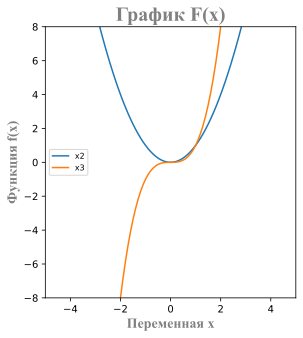

In [54]:
# Меняем локацию легенды
plt.axis([-5,5,-8,8])
plt.plot(x, x2, label='x2')
plt.plot(x, x3, label='x3')
plt.title("График F(x)", fontdict=title_dict)
plt.xlabel('Переменная x',fontdict=labels_dict)
plt.ylabel('Функция f(x)',fontdict=labels_dict)
plt.legend(loc='center left', fontsize=8)
plt.show()

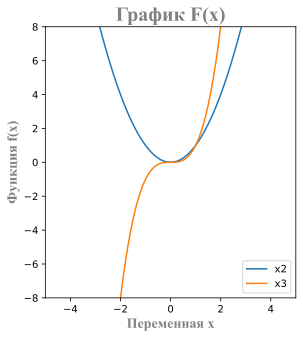

In [55]:
# Добавляем параметры легенды с помощью словаря
legend_dict = {'family':'Verdana', 'size':10}

plt.axis([-5,5,-8,8])
plt.plot(x, x2, label='x2')
plt.plot(x, x3, label='x3')
plt.title("График F(x)", fontdict=title_dict)
plt.xlabel('Переменная x',fontdict=labels_dict)
plt.ylabel('Функция f(x)',fontdict=labels_dict)
plt.legend(loc='lower right', prop=legend_dict)
plt.show()

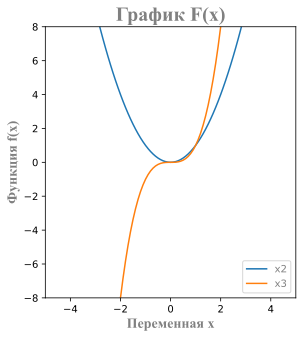

In [56]:
# Меняем параметры легенды более сложным способом
plt.axis([-5,5,-8,8])
plt.plot(x, x2, label='x2')
plt.plot(x, x3, label='x3')
plt.title("График F(x)", fontdict=title_dict)
plt.xlabel('Переменная x',fontdict=labels_dict)
plt.ylabel('Функция f(x)',fontdict=labels_dict)

legend = plt.legend(loc='lower right', prop=legend_dict)
plt.setp(legend.get_texts(), color='grey')

plt.show()

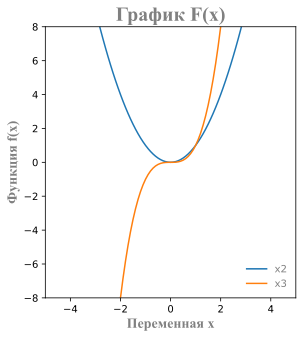

In [57]:
# Убираем рамку легенды
plt.axis([-5,5,-8,8])
plt.plot(x, x2, label='x2')
plt.plot(x, x3, label='x3')
plt.title("График F(x)", fontdict=title_dict)
plt.xlabel('Переменная x',fontdict=labels_dict)
plt.ylabel('Функция f(x)',fontdict=labels_dict)

legend = plt.legend(loc='lower right', prop=legend_dict, frameon=False)
plt.setp(legend.get_texts(), color='grey')

plt.show()

In [58]:
# Меняем форматирование линий

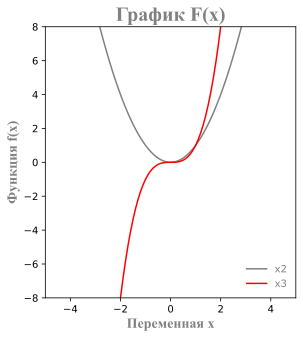

In [59]:
# меняем цвет линий
plt.axis([-5,5,-8,8])
plt.plot(x, x2, label='x2', color='grey')
plt.plot(x, x3, label='x3', color='red')
plt.title("График F(x)", fontdict=title_dict)
plt.xlabel('Переменная x',fontdict=labels_dict)
plt.ylabel('Функция f(x)',fontdict=labels_dict)

legend = plt.legend(loc='lower right', prop=legend_dict, frameon=False)
plt.setp(legend.get_texts(), color='grey')

plt.show()

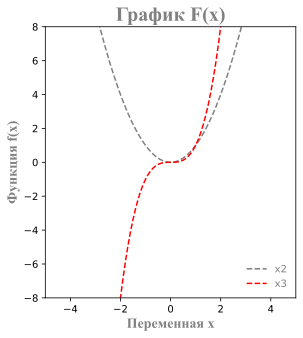

In [60]:
# Меняем стиль линий
plt.axis([-5,5,-8,8])
plt.plot(x, x2, label='x2', color='grey', linestyle='dashed')
plt.plot(x, x3, label='x3', color='red', linestyle='dashed')
plt.title("График F(x)", fontdict=title_dict)
plt.xlabel('Переменная x',fontdict=labels_dict)
plt.ylabel('Функция f(x)',fontdict=labels_dict)

legend = plt.legend(loc='lower right', prop=legend_dict, frameon=False)
plt.setp(legend.get_texts(), color='grey')

plt.show()

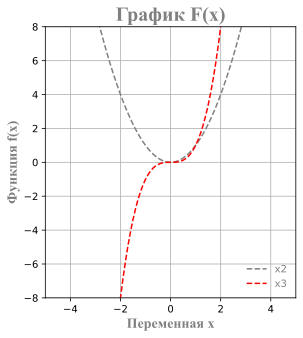

In [61]:
# Добавляем сетку на график
plt.axis([-5,5,-8,8])
plt.plot(x, x2, label='x2', color='grey', linestyle='dashed')
plt.plot(x, x3, label='x3', color='red', linestyle='dashed')
plt.title("График F(x)", fontdict=title_dict)
plt.xlabel('Переменная x',fontdict=labels_dict)
plt.ylabel('Функция f(x)',fontdict=labels_dict)

legend = plt.legend(loc='lower right', prop=legend_dict, frameon=False)
plt.setp(legend.get_texts(), color='grey')

plt.grid()
plt.show()

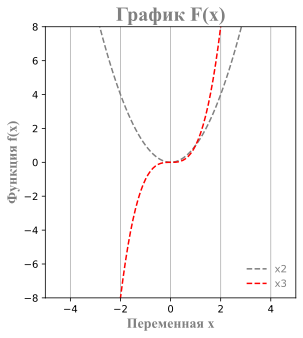

In [62]:
# Меняем линии сетки
plt.axis([-5,5,-8,8])
plt.plot(x, x2, label='x2', color='grey', linestyle='dashed')
plt.plot(x, x3, label='x3', color='red', linestyle='dashed')
plt.title("График F(x)", fontdict=title_dict)
plt.xlabel('Переменная x',fontdict=labels_dict)
plt.ylabel('Функция f(x)',fontdict=labels_dict)

legend = plt.legend(loc='lower right', prop=legend_dict, frameon=False)
plt.setp(legend.get_texts(), color='grey')

plt.grid(axis='x')
plt.show()

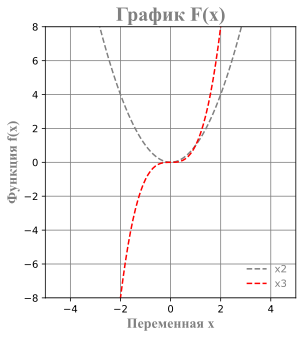

In [63]:
# Меняем цвет сетки
plt.axis([-5,5,-8,8])
plt.plot(x, x2, label='x2', color='grey', linestyle='dashed')
plt.plot(x, x3, label='x3', color='red', linestyle='dashed')
plt.title("График F(x)", fontdict=title_dict)
plt.xlabel('Переменная x',fontdict=labels_dict)
plt.ylabel('Функция f(x)',fontdict=labels_dict)

legend = plt.legend(loc='lower right', prop=legend_dict, frameon=False)
plt.setp(legend.get_texts(), color='grey')

plt.grid(color='grey')
plt.show()

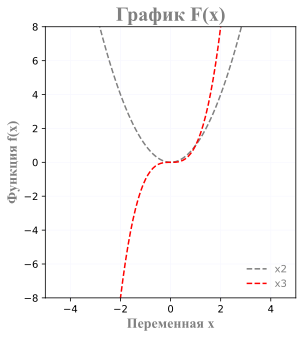

In [64]:
# Делаем цвет сетки призрачным
plt.axis([-5,5,-8,8])
plt.plot(x, x2, label='x2', color='grey', linestyle='dashed')
plt.plot(x, x3, label='x3', color='red', linestyle='dashed')
plt.title("График F(x)", fontdict=title_dict)
plt.xlabel('Переменная x',fontdict=labels_dict)
plt.ylabel('Функция f(x)',fontdict=labels_dict)

legend = plt.legend(loc='lower right', prop=legend_dict, frameon=False)
plt.setp(legend.get_texts(), color='grey')

plt.grid(color='ghostwhite')
plt.show()

In [65]:
# Практическая часть

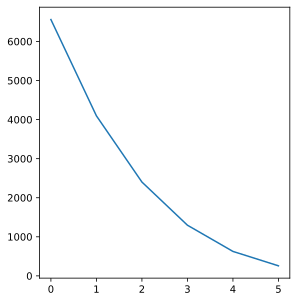

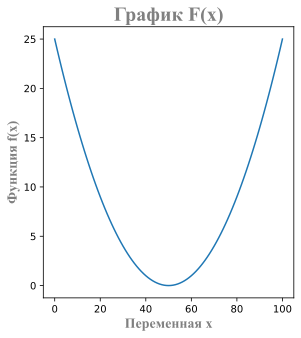

In [110]:
def graf(x, outerfunc, save_pic=False, make_nice=False ):
    x = outerfunc(x)
    plt.plot(x)
    if make_nice:
        plt.title("График F(x)", fontdict=title_dict)
        plt.xlabel('Переменная x',fontdict=labels_dict)
        plt.ylabel('Функция f(x)',fontdict=labels_dict)
    else:
        plt.title("График F(x)")
        plt.xlabel('Переменная x')
        plt.ylabel('Функция f(x)')
    if save_pic:
        plt.savefig('график')
graf(x, outerfunc, save_pic=True ,make_nice=True)

In [69]:
# 1. Напишите функцию, которая на вход принимает x и функцию в качестве аргументов и рисует график

In [70]:
# 2. Добавьте аргумент, дающий возможность сохранения графика в файл

In [120]:
# 3. Добавьте аргументы, позволяющие сделать график более симпатичным

# ООП подход для графиков 
* Объект figure
* Объект axes
*  axes != axis  - Это разные вещи

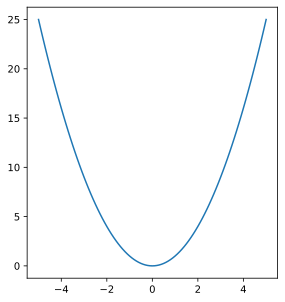

In [70]:
x = np.linspace(-5,5,101)
x2 = list(map(lambda x: x**2, x))

fig, ax = plt.subplots(nrows=1,ncols=1)
ax.plot(x,x2);

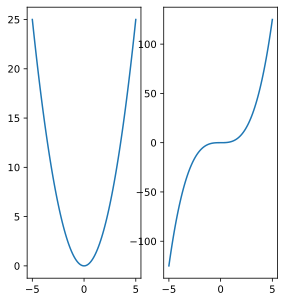

In [128]:
# Созание объектов figure и axes
fig, ax = plt.subplots(nrows=1,ncols=2)
ax1, ax2 = ax
ax1.plot(x,x2)
ax2.plot(x,x3);

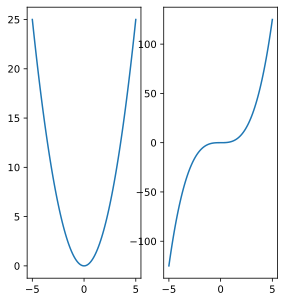

In [71]:
fig, ax = plt.subplots(nrows=1,ncols=2)
ax1, ax2 = ax.flatten()
ax1.plot(x,x2)
ax2.plot(x,x3);

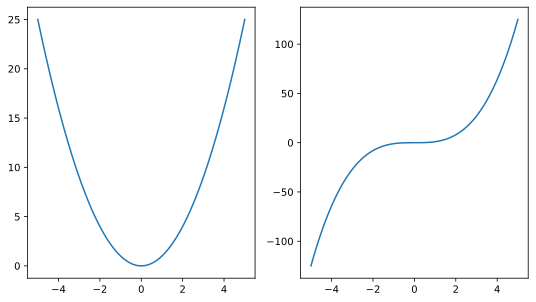

In [72]:
# Скорректируем размеры графиков
fig, ax = plt.subplots(nrows=1,ncols=2)
ax1, ax2 = ax.flatten()
ax1.plot(x,x2)
ax2.plot(x,x3);
fig.set_size_inches(9,5)

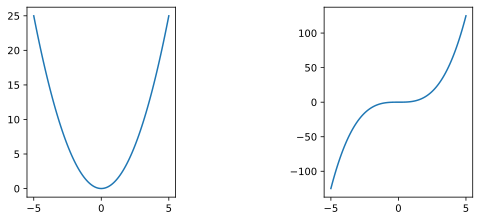

In [73]:
# Увеличим расстояние между графиками
fig, ax = plt.subplots(nrows=1,ncols=2)
ax1, ax2 = ax.flatten()
ax1.plot(x,x2)
ax2.plot(x,x3);
fig.set_size_inches(8,3.5)
plt.subplots_adjust(wspace=1)

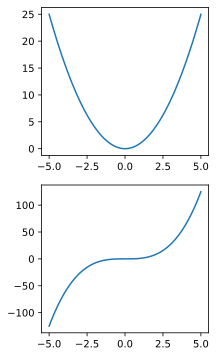

In [74]:
# Размстим графики вертикально
fig, ax = plt.subplots(nrows=2,ncols=1)
ax1, ax2 = ax.flatten()
ax1.plot(x,x2)
ax2.plot(x,x3);
fig.set_size_inches(3,6)

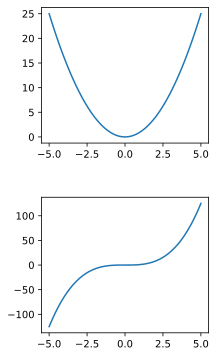

In [75]:
# Изменим расстояние между графиками
fig, ax = plt.subplots(nrows=2,ncols=1)
ax1, ax2 = ax.flatten()
ax1.plot(x,x2)
ax2.plot(x,x3);
fig.set_size_inches(3,6)
plt.subplots_adjust(hspace=0.4)

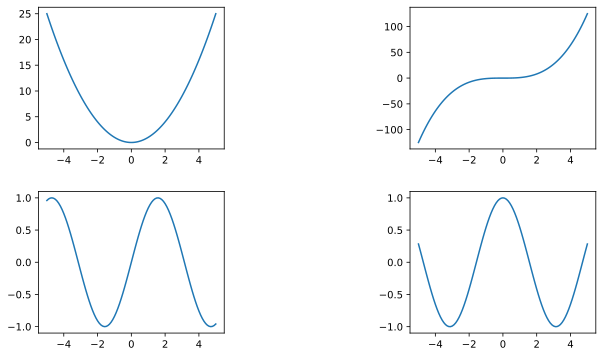

In [76]:
# Создадим 4 графика 
y = np.sin(x)
z = np.cos(x)
fig, ax = plt.subplots(nrows=2,ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()
ax1.plot(x,x2)
ax2.plot(x,x3)
ax3.plot(x,y)
ax4.plot(x,z)
fig.set_size_inches(10,6)
plt.subplots_adjust(hspace=0.3,wspace=1 )

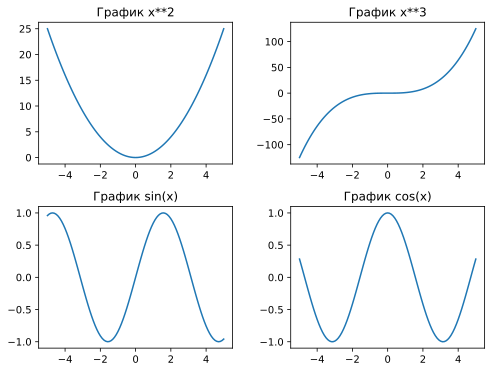

In [77]:
# Создатим заголовки для каждого графика
fig, ax = plt.subplots(nrows=2,ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()
ax1.plot(x,x2)
ax1.set_title('График x**2')
ax2.plot(x,x3)
ax2.set_title('График x**3')
ax3.plot(x,y)
ax3.set_title('График sin(x)')
ax4.plot(x,z)
ax4.set_title('График cos(x)')
fig.set_size_inches(8,6)
plt.subplots_adjust(hspace=0.3,wspace=0.3 )

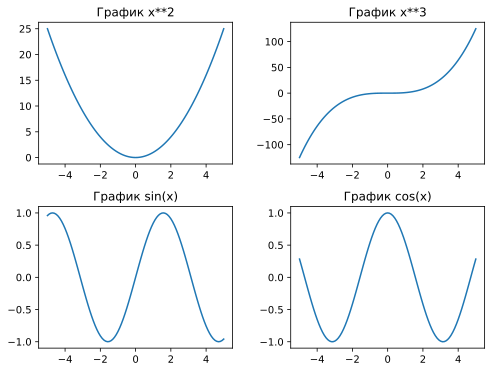

In [78]:
# Выравниваем по оси Y 
fig, ax = plt.subplots(nrows=2,ncols=2, sharey=False)
ax1, ax2, ax3, ax4 = ax.flatten()
ax1.plot(x,x2)
ax1.set_title('График x**2')
ax2.plot(x,x3)
ax2.set_title('График x**3')
ax3.plot(x,y)
ax3.set_title('График sin(x)')
ax4.plot(x,z)
ax4.set_title('График cos(x)')
fig.set_size_inches(8,6)
plt.subplots_adjust(hspace=0.3,wspace=0.3 )


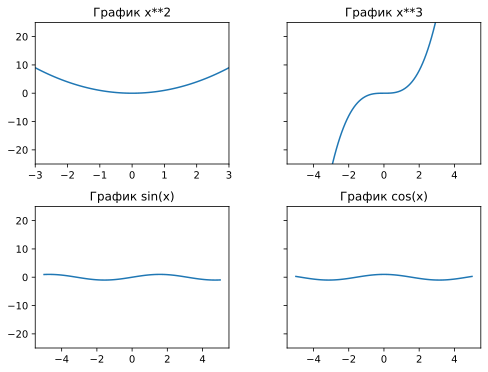

In [79]:
# Корректируем размеры осей у графиков
fig, ax = plt.subplots(nrows=2,ncols=2, sharey=True)
ax1, ax2, ax3, ax4 = ax.flatten()
ax1.plot(x,x2)
ax1.set_title('График x**2')
ax1.set_xlim([-3,3])
ax2.plot(x,x3)
ax2.set_title('График x**3')
ax2.set_ylim([-25,25])
ax3.plot(x,y)
ax3.set_title('График sin(x)')
ax4.plot(x,z)
ax4.set_title('График cos(x)')
fig.set_size_inches(8,6)
plt.subplots_adjust(hspace=0.3,wspace=0.3 )

In [80]:
# Seaborn
import seaborn as sns
sns.set(style="ticks", palette="GnBu_d")

In [81]:
# !pip install seaborn

In [86]:
# bm_price_series.reset_index()

In [82]:
b5 = pd.read_csv('data/PT.csv', decimal=',')

In [83]:
b5.head()

,Название показателя,Оценка по показателю
0,Открытость новому,1.7
1,Открытость новому,4.4
2,Открытость новому,9.6
3,Открытость новому,3.6
4,Открытость новому,8.7


In [84]:
b5= b5[~b5['Название показателя'].isin(['Следование правилам', 'Командность']) ].copy()

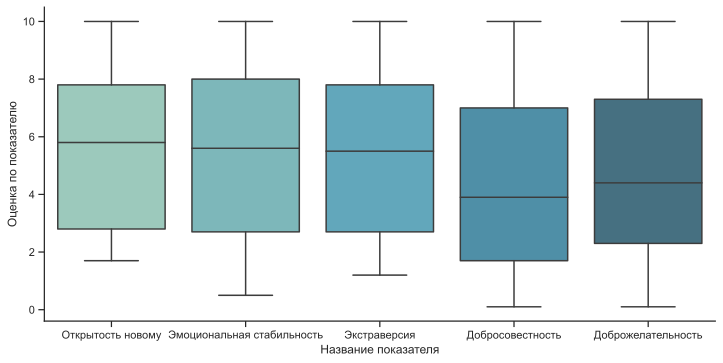

In [85]:
sns.catplot(x="Название показателя",
            y="Оценка по показателю",
            kind="box",
             aspect=2,
            data=b5);

In [86]:
import random

In [87]:
b5.shape

(127848, 2)

In [88]:
groups = []
group_num = ['group1','group2','group3','group4']
for x in range(b5.shape[0]):
       groups.extend(random.sample(group_num,1) )

In [89]:
b5['groups'] = groups

In [90]:
b5.head()

,Название показателя,Оценка по показателю,groups
0,Открытость новому,1.7,group4
1,Открытость новому,4.4,group1
2,Открытость новому,9.6,group3
3,Открытость новому,3.6,group3
4,Открытость новому,8.7,group2


In [91]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display

In [92]:
# Добавляем интерактивность
def box_plotter(df, group):
    term = df['groups'] == group
    sns.catplot(x='Название показателя', 
            y='Оценка по показателю', 
            aspect=2,
            kind="box", 
            showfliers=False,
            data=df[term]);

def f(group):
    ''' Запускаем боксплот '''
    box_plotter(b5,group)

In [93]:
# Запускаем 
interact(f, group=group_num);

interactive(children=(Dropdown(description='group', options=('group1', 'group2', 'group3', 'group4'), value='g…

In [249]:
# Интерактивность и plotly

In [173]:
import plotly.graph_objects as go
import numpy as np
x = np.arange(10)
fig = go.Figure(data=go.Scatter(x=x, y=x**2))
fig.show()